Detect an object that is bike or not
Organized by Vincent Yeozekiel

In [1]:
import numpy as np
import itertools
import shutil
import random
import glob
import matplotlib.pyplot as plt
import cv2
import warnings
import os
from keras.utils import np_utils
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

#  Load Dataset

Load images and store it in an array

In [2]:
dataset=["Bike", "Cars", "Cats", "Dogs", "Flowers", "Horses", "Human"]
dir="C:/Users/vince/Documents/data/"
loadedImages=[]

for category in dataset:
    path=os.path.join(dir, category) # path to dir
    for image in os.listdir(path):
        image_array=cv2.imread(os.path.join(path, image), cv2.COLOR_BGR2GRAY)
        image_array_resize= cv2.resize(image_array,(128,128))
        loadedImages.append(image_array_resize)

In [3]:
img_data = np.array(loadedImages)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

(1803, 128, 128, 3)


# EDA and Preprocessing

In [4]:
classes={}
directory={}
for category in dataset:
    path=os.path.join(dir, category)
    print('Jumlah ', category, ':', len(os.listdir(path)))
    directory[category]=path
    classes[category]=len(os.listdir(path))

Jumlah  Bike : 365
Jumlah  Cars : 420
Jumlah  Cats : 202
Jumlah  Dogs : 202
Jumlah  Flowers : 210
Jumlah  Horses : 202
Jumlah  Human : 202


In [5]:
#Labelling the image
num_classes = 7
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')
labels[0:365]=0
labels[365:567]=1
labels[567:987]=2
labels[987:1189]=3
labels[1189:1399]=4
labels[1399:1601]=5
labels[1601:1803]=6

In [6]:
Y = np_utils.to_categorical(labels, num_classes)
Y[1]

array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [7]:
#for i in range(len(loadedImages)):
    #plt.imshow(loadedImages[i])
    #plt.show()

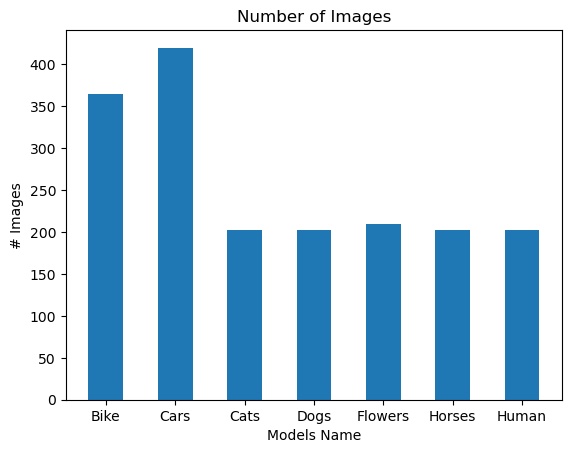

In [8]:
plt.bar(classes.keys(), classes.values(), width = .5);
plt.title("Number of Images");
plt.xlabel('Models Name');
plt.ylabel('# Images');

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [10]:
x,y = shuffle(img_data,Y, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=Y, random_state=2)

In [11]:
print("X_train shape = {}".format(X_train.shape))
print("X_test shape = {}".format(X_test.shape))

X_train shape = (1442, 128, 128, 3)
X_test shape = (361, 128, 128, 3)


Text(0.5, 1.0, 'Sample\nBelow is a figure with label [0. 0. 0. 0. 1. 0. 0.]')

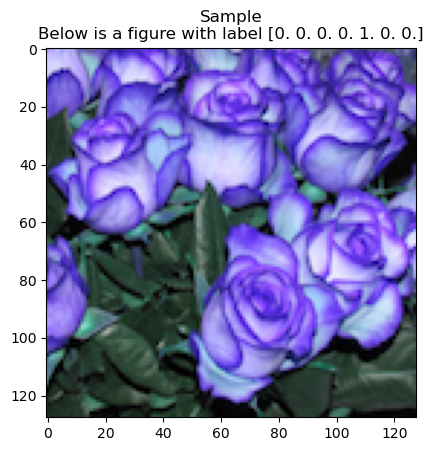

In [12]:
plt.imshow(X_train[131])
plt.title('Sample\nBelow is a figure with label '+ str(y_train[131]))

In [13]:
input_shape=img_data[0].shape
input_shape

(128, 128, 3)

In [14]:
tf.config.list_physical_devices('GPU')

[]

In [15]:
#Create CNN Models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 26912)             0

In [17]:
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
46/46 [==============================] - 10s 211ms/step - loss: 1.6881 - accuracy: 0.3786 - val_loss: 1.4615 - val_accuracy: 0.4654
Epoch 2/25
46/46 [==============================] - 9s 189ms/step - loss: 1.3536 - accuracy: 0.5166 - val_loss: 1.2362 - val_accuracy: 0.5374
Epoch 3/25
46/46 [==============================] - 9s 190ms/step - loss: 1.0950 - accuracy: 0.5888 - val_loss: 1.0150 - val_accuracy: 0.5928
Epoch 4/25
46/46 [==============================] - 9s 188ms/step - loss: 0.8586 - accuracy: 0.6824 - val_loss: 0.9379 - val_accuracy: 0.6122
Epoch 5/25
46/46 [==============================] - 9s 188ms/step - loss: 0.7132 - accuracy: 0.7282 - val_loss: 1.1998 - val_accuracy: 0.5263
Epoch 6/25
46/46 [==============================] - 9s 188ms/step - loss: 0.6495 - accuracy: 0.7670 - val_loss: 1.0637 - val_accuracy: 0.6150
Epoch 7/25
46/46 [==============================] - 9s 189ms/step - loss: 0.4914 - accuracy: 0.8197 - val_loss: 1.1765 - val_accuracy: 0.5679
Epoch

12/12 - 1s - loss: 1.7437 - accuracy: 0.6371 - 512ms/epoch - 43ms/step


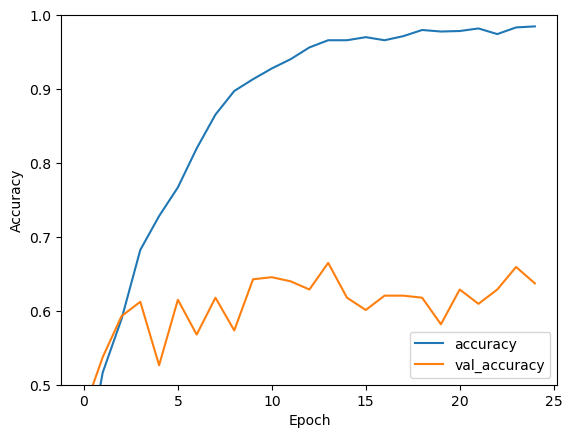

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [20]:
print(test_acc)

0.6371191143989563


Akurasinya sekitar 63%

# Detect other picture

In [99]:
test_image = X_test[8:9]
print(model.predict(test_image))
k=int(np.argmax(model.predict(test_image), axis=-1))

if dataset[k]=='Bike':
    print('Bike detected')
elif (dataset[k]!='Bike') & (k<7 | k>0):
    print('Bike undetected', dataset[k], ' detected')
else:
    print('Bike undetected')

1/1 [==============================] - 0s 10ms/step
[[1.0000000e+00 3.6935698e-14 1.2975406e-09 2.2813986e-12 3.1472039e-16
  5.2734128e-15 2.9273559e-13]]
1/1 [==============================] - 0s 16ms/step
Bike detected
